# Assignment 1

This is due in on Friday **November 18th before 2pm**. Mark weighting is in brackets. Do add comments to your code, you'll lose points if your code is hard to understand. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub **after** having run all cells with `Runtime`->`Restart and run all`. You should then do `File`->`Save a copy in GitHub`, do remember to keep the same filename and work directly in the `assignment_1.ipynb` worksheet, adding as many code cells as needed. You can (and should) save as often as possible, only the latest version uploaded before the deadline will be marked.

_It is recommended to only attempt this assignment after having gone through the "Curve fitting" worksheet._

For the first assignment you will read in some noisy data which represents a solar black body spectrum. See http://rredc.nrel.gov/solar/spectra/am0/ASTM2000.html for more details. Your job is to fit the data with a black body spectrum to find the temperature (with error estimate) in a similar way to the curve fitting.

1. [2] Download (with `wget`) and read in the data file [E490_00a_AMO.txt](https://raw.githubusercontent.com/PX2134/data/master/assignment1/E490_00a_AMO.txt). It comprises x, y data in two columns; the first column is wave length in units of $10^{-6} m$ or $\mu m$, and the second column is in $Wm^{−2}\mu m^{−1}$ units. Plot it out, selecting a sensible data range and scale.
2. [2] Define a suitable fitting function `Planck_Lambda(lam, *p)`. This function is to be based on the Planck formula
   $$ B_{\lambda}(T)= \left( \frac{2hc^2}{\lambda^5} \right) \left[ \exp(\frac{hc}{\lambda kT})-1 \right] ^{-1} $$
   where $k$ is Boltzmann’s constant, $h$ is Planck’s constant and $c$ is the speed of light. Note that you will actually need _two_ fitting parameters ($T$, and an overall scaling factor $A$, since the vertical scale is effectively in arbitrary units).
3. [2] Plot a separate graph of your fitting function, i.e. plot $B_{\lambda}$ against $\lambda$ for a range of $T$ values in order to see how the function behaves. Pick enough $T$ values to illustrate the form of the function.
4. [6] Use the `curve_fit` routine to fit `Planck_Lambda` to the data and hence find the parameters (and their errors). Remember that the initial guess will now have to contain 2 parameters ($T$ and $A$). Plot the selected data points and a curve of the fitted function on the same graph to compare.
You might need to _select_ a small range of the spectrum around the peak to get a satisfactory fit or initial idea of good parameters. Experiment with this.
5. [2] Plot the residuals on a separate graph. Comment on what you find.
6. [1] Find the wavelength $\lambda_{max}$ at which your best fit from question 4 for the solar black body spectrum is maximal.
7. [5] We will now use the uncertainties package to propagate the error from your best-fit measurement. To do so, we need a new function, `um_Planck_Lambda(lam, *p)`, able to process the uncertainties object `uncertainties.ufloat`. Adapt your function `Planck_Lambda(lam, *p)` into a new function `um_Planck_Lambda(lam, *p)` which is able to take as input for the arguments $A$ and $T$ `uncertainties` objects.

   Use your new function `um_Planck_Lambda(lam, *p)` to compute $B_{\lambda_{max}}(T)$ and it error for your best fit parameters $A_{best}$ and $T_{best}$ with the $A_{best}$ and $T_{best}$ values as `uncertainties` objects, with the errors found in question 4.

   Finally, with that same `um_Planck_Lambda(lam, *p)` function, make a plot using pyplot's [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) by adding the error for each $B_{\lambda}(T)$ computed. Comment on what you find.

In [1]:
#Download file
!wget https://raw.githubusercontent.com/PX2134/data/master/assignment1/E490_00a_AMO.txt

--2022-11-16 18:57:38--  https://raw.githubusercontent.com/PX2134/data/master/assignment1/E490_00a_AMO.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19990 (20K) [text/plain]
Saving to: ‘E490_00a_AMO.txt.2’

E490_00a_AMO.txt.2  100%[===================>]  19.52K  --.-KB/s    in 0s      

2022-11-16 18:57:38 (101 MB/s) - ‘E490_00a_AMO.txt.2’ saved [19990/19990]



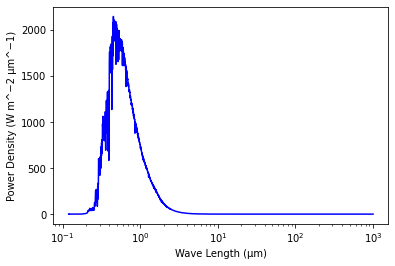

In [2]:
#Unpack the data and plot 

import numpy as np
import matplotlib.pyplot as plt

waveLength, powDensity = np.loadtxt('E490_00a_AMO.txt', unpack = True)
##This line of code will return a "Cannot convert string to float" error if a delimiter argument is passed

plt.semilogx(waveLength,powDensity,"b-");
plt.xlabel("Wave Length (μm)");
plt.ylabel("Power Density (W m^−2 μm^−1)");


In [10]:
def Planck_Lambda(lam, A, *T):
  #T = p[0]
  #A = p[1] 
  
  #Needed constants
  k = 1.3806503e-23 #m2 kg s-2 K-1
  h = 6.626068e-34  #m2 kg s-1
  c = 299792458     #m  s-1

  return A * ( ((2*h*(c**2))/ (lam**5) ) * ((np.exp( (h*c) / (lam * k * T) )-1)**-1) )

In [16]:
#create variables to pass to function

lam = np.arange(10e-1,10e3)

T = np.array([3e6,3e8,3e10])
A = 1
p = T , A


results = Planck_Lambda(lam,A,T[2])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in reciprocal
  # Remove the CWD from sys.path while we load stuff.


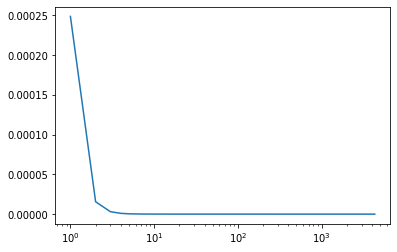

In [17]:
plt.semilogx(lam,results)
